In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt("D:\Daten mit Änderungen\Physik\Bachelorarbeit\Generated_Data\Moderators\meds_N10000_a3.0_b5.0_.csv", delimiter=',')
data1 = np.loadtxt("D:\Daten mit Änderungen\Physik\Bachelorarbeit\Generated_Data\Moderators\inf_N10000_a3.0_b5.0_.csv", delimiter=',')

print(data)

np.mean(data)

np.max(data)

[0.0675509  0.08869292 0.36856152 ... 0.15353242 0.08591898 0.09585447]


4.720236530232508

In [3]:
def binning(data, num_bins):
    bins = np.logspace(np.log10(0.01), np.log10(10.0), num_bins)

    # print(len(bins))

    binned_inds = np.digitize(data, bins=bins)

    # print(len(binned_inds))

    binned_data = np.bincount(binned_inds)

    # print(binned_data)

    res = np.zeros(num_bins-1)

    for i in range(len(binned_data)):
        res[i] = binned_data[i]

    res = res / (len(data) * np.diff(bins))

    return res

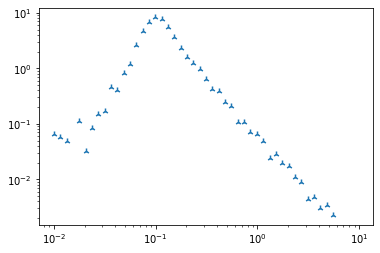

In [4]:
nb = 50

binned_data = binning(data, nb)

bins_plt = np.logspace(np.log10(0.01), np.log10(10.0-(10-0.01)/nb), nb-1)

# print(bins_plt)

# print(len(binned_data), len(bins_plt))

plt.figure()
plt.scatter(bins_plt, binned_data, marker='2')
#plt.bar(bins_plt, binned_data, )
plt.xscale('log')
plt.yscale('log')

[2.10982667 0.06976973]


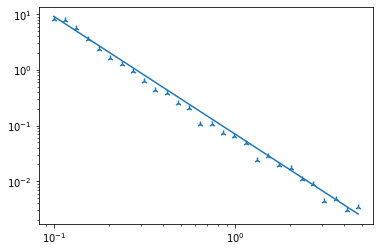

In [5]:
from scipy.optimize import curve_fit

def func_powerlaw(x, gam, c):
    return x**-gam * c

fro = 16
to = 44

popt, pcov = curve_fit(func_powerlaw, bins_plt[fro:to], binned_data[fro:to], p0=[-2.1, 0.02])
print(popt)

plt.figure()
plt.scatter(bins_plt[fro:to], binned_data[fro:to], marker='2')
plt.plot(bins_plt[fro:to], func_powerlaw(bins_plt[fro:to], popt[0], popt[1]))
plt.xscale('log')
plt.yscale('log')

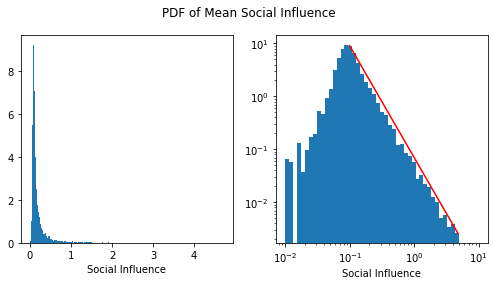

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(7,4))
ax[0].hist(data, bins=200, density=True)
ax[1].hist(data, bins=np.logspace(np.log10(0.01), np.log10(10.0), 50), density=True)
ax[1].plot(bins_plt[fro:to], func_powerlaw(bins_plt[fro:to], popt[0], popt[1]), color='r')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
plt.suptitle('PDF of Mean Social Influence')
ax[0].set_xlabel("Social Influence")
ax[1].set_xlabel("Social Influence")
plt.tight_layout()
plt.savefig("D:\Daten mit Änderungen\Physik\Bachelorarbeit\Figures\Mean_infl_2.png", dpi=300)